In [173]:
!pip install geopandas

     |████████████████████████████████| 921kB 463kB/s eta 0:00:01
     |████████████████████████████████| 11.9MB 767kB/s eta 0:00:01
     |████████████████████████████████| 1.5MB 1.6MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 699kB/s eta 0:00:01
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=5793 sha256=994ec1ef7d83e9e2fe86f5a446f8a14df4702e80de47b5c91ea3623803cfd478
  Stored in directory: /home/danielmarx/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch
You should consider upgrading via the 'pip install --upgrade pip' command.


In [180]:
!pip install descartes

You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [2]:
meta = pd.read_csv('bdmep_meta.csv')

In [3]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 11 columns):
id              389 non-null int64
lon             389 non-null float64
lat             389 non-null float64
alt             389 non-null float64
name            389 non-null object
state           389 non-null object
uf              389 non-null object
time_zone       389 non-null object
offset_utc      389 non-null int64
time_zone.1     389 non-null object
offset_utc.1    389 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 33.5+ KB


In [7]:
#Objeto pandas, especificando-se as latitudes e longitudes a serem plotadas
gdf = geopandas.GeoDataFrame(
    meta, geometry=geopandas.points_from_xy(meta.lon, meta.lat))

In [9]:
gdf.head()

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1,geometry
0,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,POINT (-68.73333333333331 -11.0166666666667)
1,82704,-72.666667,-7.633333,170.00,Cruzeiro do Sul,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,POINT (-72.6666666666667 -7.63333333333333)
2,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,POINT (-67.8 -9.96666666666667)
3,82807,-70.766667,-8.166667,190.00,Tarauacá,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,POINT (-70.76666666666669 -8.16666666666667)
4,83098,-36.166667,-10.150000,56.13,Coruripe,Alagoas,AL,America/Maceio,-3,America/Maceio,-3,POINT (-36.1666666666667 -10.15)


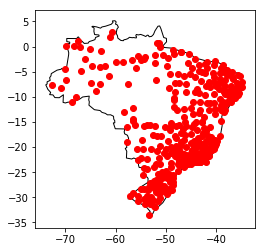

In [8]:
#Objeto pandas com o mapa múndi 
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

#plot limitado ao Brasil
ax = world[world.name == 'Brazil'].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()

In [10]:
data = [['date', 'data e hora da coleta', '-'], 
       ['id' ,'ID da estação de coleta', '-'],
        ['prec', 'precipitação', 'mm'],
   ['tair', 'temperatura do ar', 'graus Celsius'],
     ['tw', 'temperatura de bulbo úmido', 'graus Celsius'],
   ['tmax', 'temperatura máxima do ar', 'graus Celsius'],
   ['tmin', 'temperatura mínima do ar', 'graus Celsius'],
  ['urmax', 'umidade relativa máxima', '%'],
   ['patm', 'pressão atmosférica', 'hPa'],
   ['pnmm', 'pressão atmosférica média ao nível do mar', 'hPa'],
     ['wd', 'direção do vento', 'graus'],
  ['wsmax', 'rajadas de vento', 'm/s'],
      ['n', 'horas de sol', 'h'],
     ['cc', 'cobertura de nuvens', '-'],
   ['evap ', 'evaporação', 'mm'],
     ['ur', 'umidade relativa', '%'],
     ['ws', 'velocidade do vento', 'm/s']
       ]

In [11]:
#Descrição dos atributos da base de dados do INMETRO
pd.DataFrame(np.array(data), columns = ['Variável', 'Descrição', 'Unidade'])

,Variável,Descrição,Unidade
0,date,data e hora da coleta,-
1,id,ID da estação de coleta,-
2,prec,precipitação,mm
3,tair,temperatura do ar,graus Celsius
4,tw,temperatura de bulbo úmido,graus Celsius
5,tmax,temperatura máxima do ar,graus Celsius
6,tmin,temperatura mínima do ar,graus Celsius
7,urmax,umidade relativa máxima,%
8,patm,pressão atmosférica,hPa
9,pnmm,pressão atmosférica média ao nível do mar,hPa


In [93]:
#Carregando dados de um estado específico
df = pd.read_csv('AL.csv')

In [94]:
#Cidades em que ocorreu coleta de dados do INMETRO
df['name'].value_counts()

Maceió                 46285
Palmeira dos Índios    37392
Porto de Pedras        29715
Pão de Acuçar          27613
Coruripe               14375
Mata Grande            10957
Name: name, dtype: int64

In [95]:
#Limitar dataframe a uma cidade específica
df = df[df['name'] == "Maceió"]

In [97]:
#Criação de features auxiliares com base nas demais
df['hour'] = pd.DatetimeIndex(df['date']).hour
df['week'] = pd.DatetimeIndex(df['date']).weekofyear
df['year'] = pd.DatetimeIndex(df['date']).year

#Features criadas com base em Year e weekofyear, os dados nulos são preenchidos pela média dos valores da semana
df["new_wsmax"] = df.groupby(["year", "week"])['wsmax'].transform(lambda x: x.fillna(x.mean()))
df["new_wd"] = df.groupby(["year", "week"])['wd'].transform(lambda x: x.fillna(x.mean()))

In [98]:
#Utilizando as datas de coleta como index do dataframe
df['date'] = df['date'].apply(pd.to_datetime)
df.set_index('date', inplace = True)

In [99]:
#Normalizar index para utilizar apenas ano-mês-dia
df.index = df.index.normalize()

In [100]:
#Novo dataframe que agrega 3 features por dia com base na média ou primeira ocorrencia da feature 
aggregate_functions = {'new_wd': 'mean', 'new_wsmax' : 'mean', 'ws' : 'first'}
df_new = df.groupby(df.index).aggregate(aggregate_functions)

In [101]:
df_new.head()

,new_wd,new_wsmax,ws
date,,,
1961-01-01,9.144928,4.942029,5.000000
1961-01-02,12.333333,5.333333,5.333333
1961-01-03,7.666667,5.333333,5.333333
1961-01-04,7.666667,5.333333,6.000000
1961-01-05,7.666667,5.333333,4.000000


In [102]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15503 entries, 1961-01-01 to 2018-12-31
Data columns (total 3 columns):
new_wd       11991 non-null float64
new_wsmax    11977 non-null float64
ws           11703 non-null float64
dtypes: float64(3)
memory usage: 484.5 KB


In [110]:
#Range de datas contendo dados a serem plotados
df_plot = df_new.loc['1986-01-01':'1994-01-01']

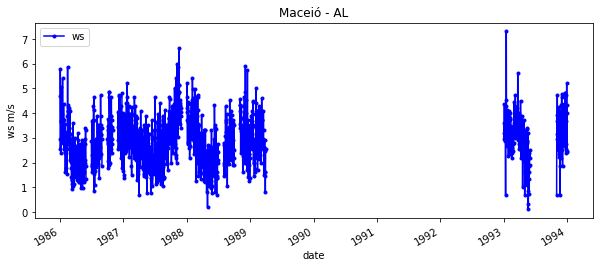

In [111]:
x = 2
plt.figure(figsize=(10,4))
df_plot[df_plot.columns[x]].plot(style = 'b.-', label= df_plot.columns[x])
plt.legend(loc='upper left')
plt.title('Maceió - AL')
plt.ylabel("ws m/s")
plt.show()